In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


# Ejemplo de Regresión No-Lineal

### Observemos el set de datos, para ver su comportamiento

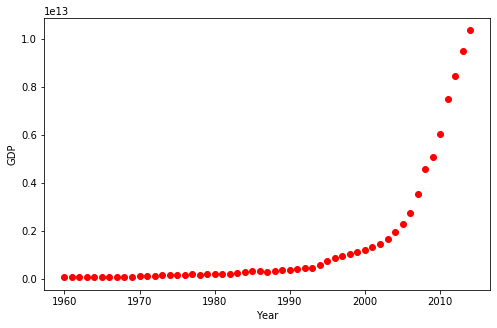

In [4]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### Elegir el modelo

A primera vista, determinamos que la función lógica podría ser una buena primera aproximación,
ya que tiene la propiedad de comenzar con un crecimiento leve, aumentando en el medio y luego descendiendo nuevamente hacia el final.

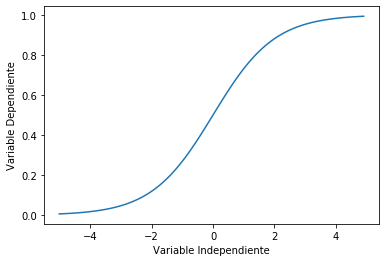

In [5]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()



La fórumla para la función logística es la siguiente:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla lo llano de la curva,

$\beta_2$: Lleva la curva sobre el eje x.

### Construir el modelo.

In [7]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

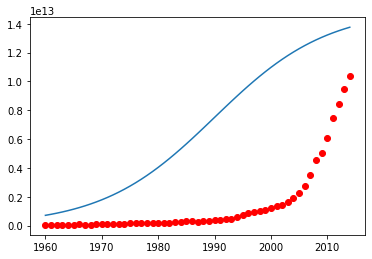

In [8]:
beta_1 = 0.10
beta_2 = 1990.0

#función logística
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#predicción de puntos
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

#### Se deben encontrar los mejores parámetros para nuestro modelo. Normalicemos primero nuestro x e y:

In [9]:
# Normalicemos nuestros datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### ¿Cómo podemos encontrar los mejores parámetros para nuestra linea?
podemos utilizar __curve_fit__ la cual utiliza cuadrados mínimos no lineales para cuadrar con la función sigmoide. Los valores óptimos para los parámetros que suman los residuos cuadrados de sigmoid(xdata, *popt) - ydata minimizado.

popt son nuestros parámetros optimizados.

In [10]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#imprimir los parámetros finales
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


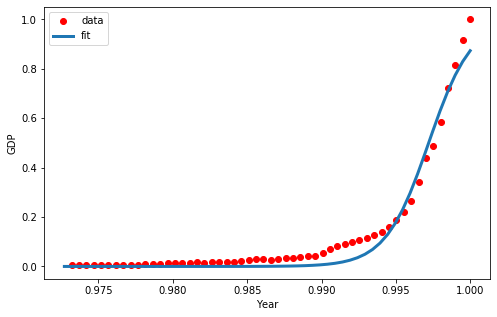

In [11]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [12]:
# divide los datos en entrenamiento y prueba
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# construye el modelo utilizando el set de entrenamiento
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predecir utilizando el set de prueba
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Promedio de error absoluto: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Suma residual de cuadrados (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2: %.2f" % r2_score(y_hat , test_y) )

Promedio de error absoluto: 0.03
Suma residual de cuadrados (MSE): 0.00
R2: 0.98
